# Actividad - K-means

* **Nombre: Samantha Daniela Guanipa Ugas**
* **Matrícula: A01703936**

**Entregar:** Archivo PDF de la actividad, así como el archivo .ipynb en tu repositorio.
**Nota:** Recuerda habrá una penalización de **50** puntos si la actividad fue entregada fuera de la fecha límite.

Carga el conjunto de datos `bestsellers with categories.csv` (se encuentra en el repositorio de la clase) y realiza un análisis estadístico de las variables.

In [ ]:
# Carga las librerías necesarias.
# Importamos las librerías que usaremos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px

In [ ]:
# Carga el conjunto de datos al ambiente de Google Colab y muestra los primeros
# 6 renglones.
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving bestsellers with categories.csv to bestsellers with categories.csv
User uploaded file "bestsellers with categories.csv" with length 51161 bytes


In [ ]:
df = pd.read_csv('bestsellers with categories.csv')
df.head(6)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction


El conjunto de datos es una tabla que contiene el top 50 de los libros más vendidos por Amazon por año desde 2009 hasta 2019. Cada libro está clasificado como Ficción o No ficción.

Las variables que contiene son:
* **Name**: Nombre del libro.
* **Author**: Autor.
* **User Rating**: Calificación promedio que los usuarios asignaron al libro (1-5).
* **Reviews**: Número de reseñas.
* **Price**: Precio del libro.
* **Year**: Año de publicación.
* **Genre**: Género literario (ficción/no ficción).

## Análisis estadístico
1. Carga la tabla de datos y haz un análisis estadístico de las variables.
* Verifica la cantidad de datos que tienes, las variables que contiene cada vector de datos e identifica el tipo de variables.
* Analiza las variables para saber que representa cada una y en que rangos se encuentran. Si la descripción del problema no te lo indica, utiliza el máximo y el mínimo para encontrarlo.
* Basándote en la media, mediana y desviación estándar de cada variable, ¿qué conclusiones puedes entregar de los datos?
* Calcula la correlación de las variables que consideres relevantes.

In [ ]:
# Escribe el código necesario para realizar el análisis estadístico descrito 
# anteriorment.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


# Análisis de los datos acorde con su media, moda y mediana


In [ ]:
df.describe()


,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


# Media
Se puede observar que en promedio, la evaluación de los usuarios es de 4.6 por libro. Además, cada libro tuvo un promedio de 11953.28 reseñas o reviews. También se observa que el precio promedio por libro es de 13.10. Y por último, el año promedio fue 2014.

In [ ]:
print('Media de reseñas: ', df['Reviews'].mean())
print('Media de precios: ', df['Price'].mean())
print('Media de puntuaciones: ', df['User Rating'].mean())
print('Media de años: ', df['Year'].mean())

Media de reseñas:  11953.281818181818
Media de precios:  13.1
Media de puntuaciones:  4.618363636363637
Media de años:  2014.0


# Mediana
Se puede observar que el valor central dentro de los valores de las reseñas es el 8580, el valor central en el conjunto de los precios es de 11.0, el valor central de los años es 2014 y por último, el valor central de las puntuaciones fue de 4.7.

In [ ]:
print('Mediana de reseñas:', df['Reviews'].median())
print('Mediana de precios:', df['Price'].median())
print('Mediana de puntuaciones:', df['User Rating'].median())
print('Mediana de años:', df['Year'].median())

Mediana de reseñas: 8580.0
Mediana de precios: 11.0
Mediana de puntuaciones: 4.7
Mediana de años: 2014.0


# Desviación estándar
Para esto hay que tomar en cuenta que un dato más cercano a cero indica que los datos tienden a estar más cercanos al promedio. Por lo tanto, las puntuaciones cuentan con una desviación estándar de 0.226, lo que indica que está cercano al promedio. Por el contrario, las reseñas tienen una desviación muy grande, lo que indica que está muy lejano del promedio. Por último, los precios sí se alejan del promedio, al igual que el año, pero no de una manera muy grande, es decir, no tienen una diferencia muy grande con respecto al promedio.


In [ ]:
print('Desviación estándar de reseñas: ', df['Reviews'].std())
print('Desviación estándar de precios: ', df['Price'].std())
print('Desviación estándar de puntuaciones: ', df['User Rating'].std())
print('Desviación estándar de año: ', df['Year'].std())


Desviación estándar de reseñas:  11731.132017431892
Desviación estándar de precios:  10.84226197842236
Desviación estándar de puntuaciones:  0.2269803650251963
Desviación estándar de año:  3.165156384169307


In [ ]:
df.groupby(['Genre', 'Year']).agg(['min', 'max'])[['Reviews', 'User Rating', 'Price']]

Reviews        User Rating      Price     
                     min    max         min  max   min  max
Genre       Year                                           
Fiction     2009     973  19720         4.0  4.8     2   82
            2010     548  32122         4.1  4.8     0   21
            2011    1463  32122         4.2  4.8     0   30
            2012    2091  57271         3.3  4.9     5   32
            2013    4748  57271         3.8  4.9     0   20
            2014     978  57271         3.9  4.9     0   39
            2015    1873  79446         3.6  4.9     0   19
            2016    3503  79446         4.0  4.9     0   52
            2017    3146  29442         4.3  4.9     0   30
            2018    5062  30183         4.3  4.9     4   27
            2019    7235  87841         4.5  4.9     4   27
Non Fiction 2009      37  10426         4.0  4.8     1   53
            2010     408  29673         4.0  4.8     2   46
            2011     637  29673         4.0  4.9     6   46
            2012    1201  29673         4.0  4.9     6   46
            2013     220  23308         4.0  4.9     4  105
            2014    1201  29673         4.0  4.9     4  105
            2015    1909  25554         4.0  4.9     4   46
            2016     807  25554         4.0  4.9     0   54
            2017    1831  26490         4.0  4.9     4   46
            2018    2507  61133         4.2  4.8     2   46
            2019    2744  61133         4.3  4.9     4   20

In [ ]:
selected = df[['Genre', 'Reviews', 'User Rating', 'Price', 'Year']]
selected.head(5)


,Genre,Reviews,User Rating,Price,Year
0,Non Fiction,17350,4.7,8,2016
1,Fiction,2052,4.6,22,2011
2,Non Fiction,18979,4.7,15,2018
3,Fiction,21424,4.7,6,2017
4,Non Fiction,7665,4.8,12,2019


In [ ]:
selected.corr()

,Reviews,User Rating,Price,Year
Reviews,1.000000,-0.001729,-0.109182,0.263560
User Rating,-0.001729,1.000000,-0.133086,0.242383
Price,-0.109182,-0.133086,1.000000,-0.153979
Year,0.263560,0.242383,-0.153979,1.000000


In [ ]:
print('Correlación entre reseñas y precios: ', selected['Price'].corr(selected['Reviews'], method='pearson'))
print('Correlación entre opiniones del usuario y precios: ', selected['User Rating'].corr(selected['Price'], method='pearson'))
print('Correlación entre puntuaciones del usuario y reviews: ', selected['User Rating'].corr(selected['Reviews'], method='pearson'))
print('Correlación entre año de publicación y precio: ', selected['Year'].corr(selected['Price'], method='pearson'))

Correlación entre reseñas y precios:  -0.10918188342780516
Correlación entre opiniones del usuario y precios:  -0.13308628728087976
Correlación entre puntuaciones del usuario y reviews:  -0.0017290142555501195
Correlación entre año de publicación y precio:  -0.15397858170435919


#¿Cuáles son las variables relevantes e irrelevantes para el análisis?
Considero que las variables relevantes para el análisis son las reseñas, el precio, el género del libro y las puntuaciones de los usuarios. Por otra parte, no considero tan relevante el año de publicación de cada libro.

## Análisis gráfico

Realiza el análisis de las variables usando diagramas de cajas y bigotes, histogramas y mapas de calor.

Responde las siguientes preguntas:
* ¿Hay alguna variable que no aporta información? Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué? *Considero que el año de publicación se podría eliminar ya que no arroja información tan relevante en el análisis y puede ser considerada cualitativa.*
* ¿Existen variables que tengan datos extraños? *No considero que hayan variables con datos extraños ya que cada dato representa lo que debe representar en la tabla,y así es observado en las gráficas. Al tener datos correctos se observa en las gráficas y se les puede dar distintas interpretaciones.*
* Si comparas las variables, ¿todas están en rangos similares? ¿Crees que esto afecte? Al comparar las puntuaciones de los usuarios se observan rangos que oscilan entre 4.5,4.6,4.7, es decir, son similares. Por otra parte, los precios y las reseñas son bastante variantes. El hecho de que sean rangos similares no afecta en sí a algún análisis, simplemente se observaría un conjunto de puntos en la misma área (como se observa en la gráfica de dispersión por puntuación de los usuarios)
* ¿Puedes encontrar grupos qué se parezcan? ¿Qué grupos son estos? Si observamos nuestra gráfica de dispersión por pairplot, hay mucha dispersión entre las variables, por lo que no existen o no se observan grupos que se parezcan.

Haz un análisis estadístico de los datos antes de empezar con la segmentación. Debe contener al menos:
* 1 gráfico de caja (boxplot)
* 1 mapa de calor
* 1 gráfico de dispersión
   
Describe brevemente las conclusiones que se pueden obtener con las gráficas.

Text(0, 0.5, 'Evaluacion')

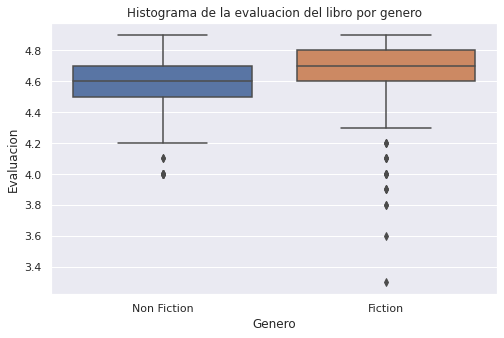

In [ ]:
# ¿Cómo se compara la evaluación del libro por género? ¿Qué genero es mejor 
# evaluado por los lectores? Muéstralo en un solo gráfico de caja y bigote.
# Tamaño de la imagen
fig = plt.figure(figsize=(8,5))

# Gráfico boxplot. Invertimos los ejes.
sns.boxplot(data=df, y='User Rating', x='Genre')

# Ejes y título. Colocamos la etiqueta correcta de acuerdo a la orientación.
plt.title('Histograma de la evaluacion del libro por genero')
plt.xlabel('Genero')
plt.ylabel('Evaluacion')

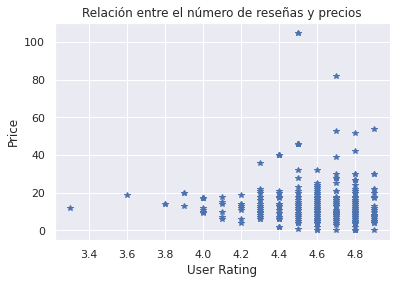

In [ ]:
# ¿Cuál es la relación entre el número de reseñas y precios? Muéstralo en un
# gráfico de dispersión.

# Configuramos el tamaño de imagen
fig = plt.figure(figsize=(6,4))

# Graficamos los incresos contra el límite de crédito
plt.plot(df['User Rating'], df['Price'], '*')

# Agregamos títulos a los ejes y al gráfico
plt.title('Relación entre el número de reseñas y precios')
plt.xlabel('User Rating')
plt.ylabel('Price')

# Agregamos la cuadrícula para que se vea mejor
plt.grid(True)

Text(0, 0.5, 'Precio')

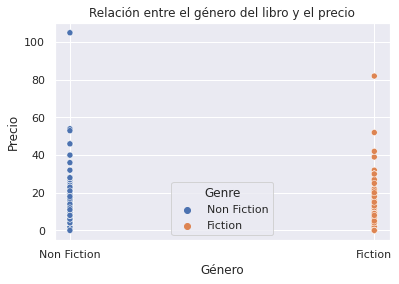

In [ ]:
# Graficaremos la relación entre el género y el precio

# Tamaño de la imagen.
fig = plt.figure(figsize=(6, 4))

# Gráfico scatterplot.
sns.scatterplot(data=df, x ='Genre', y='Price', hue='Genre')

# Ejes y título. Colocamos la etiqueta correcta de acuerdo a la orientación.
plt.title('Relación entre el género del libro y el precio')
plt.xlabel('Género')
plt.ylabel('Precio')
     

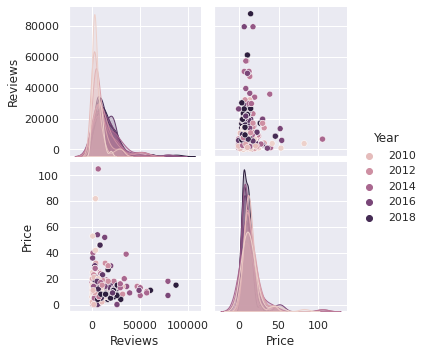

In [ ]:
# relación entre el número de reseñas, el precio y el año de publicación
selected1 = df[['Reviews', 'Price', 'Year']]
sns.pairplot(data=selected1, hue = 'Year')

<Axes: >

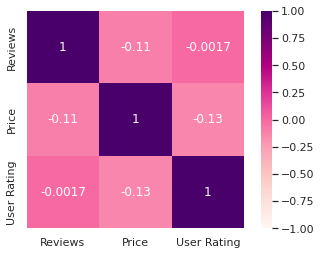

In [ ]:
#correlación entre reviews, price y user rating
selected = df[['Reviews', 'Price', 'User Rating']]
corr = selected.corr()
sns.heatmap(data=corr, vmin=-1, vmax=1, cmap = 'RdPu', annot=True, square = True)

# Conclusiones
Se puede observar que existe una leve correlacion negativa entre las variables, que mientras una incrementa la otra desciende, por ejemplo entre el precio y la puntuación del usuario y entre el precio y las reseñas de los libros. Además, se observa que no hay grupos con características similares claras ya que hay mucha dispersión entre las variables. A su vez, se observa que no hay grupos establecidos ya que los colores por género en el diagrama de dispersión se ven todos independientes. Por último, en el gráfico de caja se observa que los libros de ficción están mejor evaluados que los libros de no ficción.



## Clústering

Una vez que hayas realizado un análisis preliminar, haz una segmentación utilizando el método de K-Means. Justifica el número de clusters que elegiste.
* Determina un valor de $k$
* Calcula los centros de los grupos resultantes del algoritmo k-means

Basado en los centros responde las siguientes preguntas
- ¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué? Considero que sí debido a que queremos disminuir la distancia entre las observaciones que pertenecen a un clúster y su centro.
- ¿Cómo obtuviste el valor de $k$ a usar? El valor de k lo utilicé a partir del método del codo, en el que "la bajada" más pronunciada era en el 4. y en el Silhouette era el pico más alto en el número 4, así que usé 4 como mi k.  
- ¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo? Creo que depende mucho de la cantidad de grupos posibles, en este caso, sería menos representativos ya que se segmentaría más de lo necesario, y no me permitiría tener un dato real de cada cluster.
- ¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes? Considero que estarían muy dispersos y no se lograría obtener un grupo con características compartidas como tal, se puede hacer un análisis pero no sería muy significativo.
- ¿Qué puedes decir de los datos basándose en los centros? Puedo observar que existen 4 grupos, cada grupo representa una categoría, por ejemplo: 
1. El grupo 2 se caracteriza por tener valores de rating entre 4.6 y 4.9, además de tener reviews de entre 1000 y 10,000. 
2. El grupo 0 se caracteriza por tener un rating de entre 4.6 y 4.8, y reviews de entre 10,000 y más de 20,000 reviews.
3. El grupo 1 se caracteriza por tener ratings entre 4 y 4.3, y reviews entre 1,000 y 10,000.
4. El grupo 3 se caracteriza por tener precios muy altos, a comparación de los anteriores que están entre los $10 y $20, en este grupo los precios oscilan desde los $40 a los $53.

In [ ]:
# Implementa el algoritmo de kmeans y justifica la elección del número de 
# clusters. Usa las variables numéricas.
# Seleccionamos las variables a normalizar
numeric_cols = ['Reviews', 'User Rating',	'Price']
X = df.loc[:, numeric_cols]

# Hacemos el escalamiento.
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# El escalador nos genera una matriz de numpy. Vamos a convertirlo en DF
X_norm = pd.DataFrame(X_norm, columns=numeric_cols)
X_norm.head()

,Reviews,User Rating,Price
0,0.460453,0.359990,-0.470810
1,-0.844786,-0.080978,0.821609
2,0.599440,0.359990,0.175400
3,0.808050,0.359990,-0.655441
4,-0.365880,0.800958,-0.101547


In [ ]:
# Declaramos algunos arreglos. Los usuaremos para guardar los valores de la WCSS
 # y la silhouette score
kmax   = 10
grupos = range(2, kmax)
wcss   = []
sil_score = []
# Ciclo para calcular K-Means para diferentes k
for k in grupos:
    # Clustering
    model = KMeans(n_clusters=k, random_state = 47)

    # Obtener las etiquetas
    clusters = model.fit_predict(X_norm)

    # Guardar WCSS
    wcss.append(model.inertia_)

    # Guardar Silhouette Score
    sil_score.append(silhouette_score(X_norm, clusters))
     

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0.5, 1.0, 'Silhouette Score')

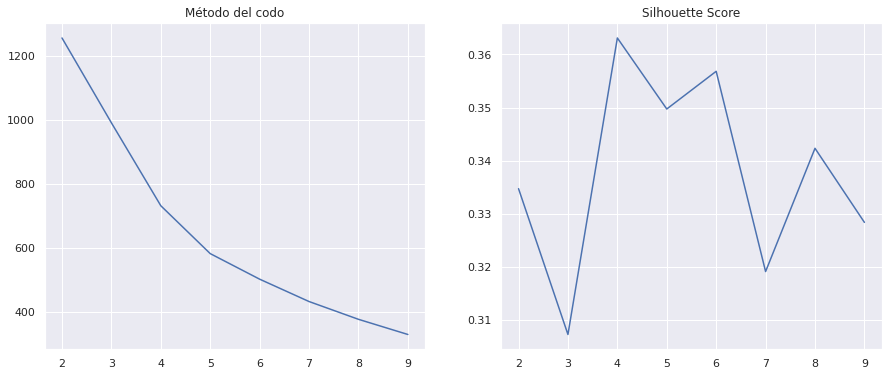

In [ ]:
# Graficaremos el codo y silhouette score en la misma gráfica. Recorda que 
# subplots nos permite tener más gráficas en la misma figura.
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Primera figura es el codo
axs[0].plot(grupos, wcss)
axs[0].set_title('Método del codo')

# La segunda es el Silhouette Score
axs[1].plot(grupos, sil_score)
axs[1].set_title('Silhouette Score')
     

In [ ]:
# Generamos los 4 grupos a partir del método del codo y del Silhouette Score
model = KMeans(n_clusters=4, random_state=47)
clusters = model.fit_predict(X_norm)

# Agregamos los clusters a nuestros DATOS ORIGINALES
df['Grupo'] = clusters.astype('str')
df.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Name,Author,User Rating,Reviews,Price,Year,Genre,Grupo
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,0
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,2
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,0
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,0
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,2


Text(0.5, 1.05, '6 grupos de libros')

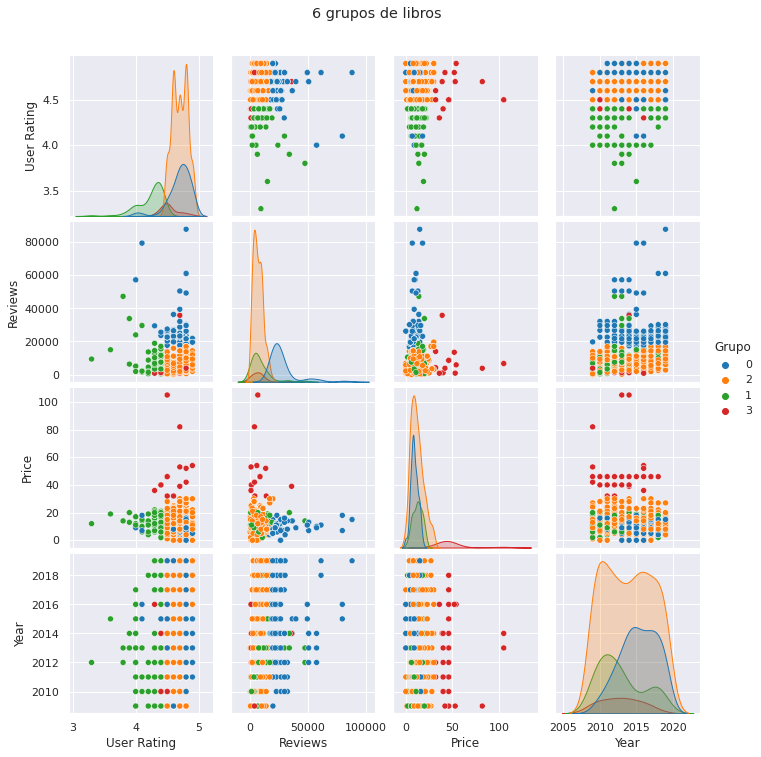

In [ ]:
sns.pairplot(data=df, hue='Grupo', palette='tab10')
plt.suptitle('6 grupos de libros', y=1.05)

Analiza las características de cada grupo. ¿Qué nombre le pondrías a cada segmento?

** Escribe la respuesta **

In [ ]:
# Haz un análisis por grupo para determinar las características que los hace 
# únicos. Ten en cuenta todas las variables numéricas.
# Veamos las características de cada grupo (i.e. los centros)
df.groupby('Grupo').mean()

,User Rating,Reviews,Price,Year
Grupo,,,,
0,4.693846,27444.646154,9.084615,2015.307692
1,4.232143,8631.666667,12.416667,2012.857143
2,4.698065,6753.977419,11.900000,2013.858065
3,4.538462,7219.538462,49.692308,2012.846154


In [ ]:
# También veamos las dispersiones
df.groupby('Grupo').std()

,User Rating,Reviews,Price,Year
Grupo,,,,
0,0.184161,12779.526505,3.833825,2.526898
1,0.208933,9097.337152,5.013736,3.081788
2,0.118770,4145.890023,6.819423,3.284639
3,0.144435,6978.798305,18.750508,2.693582


In [ ]:
# Grafica los grupos con un pairplot y con un scatterplot en 3D 
# (si es necesario). Analiza las características de cada grupo.
# Creamos la figura donde graficaremos
fig = px.scatter_3d(df, x = 'User Rating', y = 'Reviews', 
                    z = 'Price', 
                    title='4 grupos de clientes',
                    color='Grupo',  
                    color_discrete_sequence=px.colors.qualitative.D3)

# mostramos la imagen
fig.show()